In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\Kunal Rana\Downloads\DataScienceCleanStatement.csv')

## Exploring the data

In [3]:
# HOW'S DATASET LOOKS
data.head()

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Unnamed: 12
0,12/12/2019,THE ROOM GURGAON ...,0,Video game,-127,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
1,12/12/2019,CUT AND STYLEGURGAON ...,0,Occupation,-499,JASJIT KAUR,Domestic,INR,Sector 4,Gurugram,Haryana,India,NaN
2,12/12/2019,MUMUSOGURGAON ...,0,,-388,JASJIT KAUR,Domestic,INR,Sector 49,Gurugram,Haryana,India,NaN
3,12/12/2019,THE ROOM GURGAON ...,0,Video game,-108,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
4,12/12/2019,THE ROOM GURGAON ...,0,Video game,-50,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN


In [4]:
# HOW BIG IS THE DATASET
data.shape

(1470, 13)

In [5]:
#data.columns

Index(['Date      ',
       'Description                                                        ',
       'InternationTransactionAmount', '  Category', '  Amount',
       'TransactionUserName ', ' TransactionType', 'IsoCurrency', 'Locality',
       'City', 'State', 'Country', 'Unnamed: 12'],
      dtype='object')

In [6]:
# removing spaces from column headings
column = dict([(x,x.strip()) for x in list(data.columns)])
data.rename(columns = column, inplace=True)
data.columns

Index(['Date', 'Description', 'InternationTransactionAmount', 'Category',
       'Amount', 'TransactionUserName', 'TransactionType', 'IsoCurrency',
       'Locality', 'City', 'State', 'Country', 'Unnamed: 12'],
      dtype='object')

In [7]:
data.describe()

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Unnamed: 12
count,1470,1470,1470,1470,1470,1470,1470,1470,1302,1270,1245,1307,4
unique,408,495,35,153,991,7,4,5,186,41,21,7,1
top,1/8/2019,THE ROOM GURGAON ...,0,,-50,JASJIT KAUR,Domestic,INR,Central Park II,Gurugram,Haryana,India,India
freq,13,122,1436,508,25,755,1433,1433,227,930,935,1260,4


In [8]:
# CHECKING DUPLICATE VALUES
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [9]:
# CHECKING VARIABLES IN DATASET
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          1470 non-null   object
 1   Description                   1470 non-null   object
 2   InternationTransactionAmount  1470 non-null   object
 3   Category                      1470 non-null   object
 4   Amount                        1470 non-null   object
 5   TransactionUserName           1470 non-null   object
 6   TransactionType               1470 non-null   object
 7   IsoCurrency                   1470 non-null   object
 8   Locality                      1302 non-null   object
 9   City                          1270 non-null   object
 10  State                         1245 non-null   object
 11  Country                       1307 non-null   object
 12  Unnamed: 12                   4 non-null      object
dtypes: object(13)
memo

In [10]:
data.isnull().sum()

Date                               0
Description                        0
InternationTransactionAmount       0
Category                           0
Amount                             0
TransactionUserName                0
TransactionType                    0
IsoCurrency                        0
Locality                         168
City                             200
State                            225
Country                          163
Unnamed: 12                     1466
dtype: int64

In [11]:
# dropping the waste column
data.drop(['Unnamed: 12'], axis = 'columns', inplace = True)

In [12]:
data.Country.unique()

array(['India', nan, 'Malaysia', 'United States', 'Delhi', 'Singapore',
       'Haryana', 'Rajasthan'], dtype=object)

In [13]:
# fixing the wrong values
data['Country'] = data['Country'].replace(['Delhi','Haryana','Rajasthan'],'India')

In [14]:
data.Country.unique()

array(['India', nan, 'Malaysia', 'United States', 'Singapore'],
      dtype=object)

In [15]:
data.State.unique()

array(['Haryana', 'Rajasthan', nan, 'Karnataka', 'Telangana',
       'Uttar Pradesh', 'Maharashtra', 'Delhi', 'हरियाणा',
       'Wilayah Persekutuan Kuala Lumpur', 'Virginia', 'Punjab',
       'New York', 'Gurugram', 'Texas', 'Goa', 'Washington',
       'West Bengal', 'Jaipur', 'California', 'Chandigarh', 'Selangor'],
      dtype=object)

In [16]:
data['State'] = data['State'].replace(['Gurugram','Chandigarh','हरियाणा'],'Haryana')
data.State.unique()

array(['Haryana', 'Rajasthan', nan, 'Karnataka', 'Telangana',
       'Uttar Pradesh', 'Maharashtra', 'Delhi',
       'Wilayah Persekutuan Kuala Lumpur', 'Virginia', 'Punjab',
       'New York', 'Texas', 'Goa', 'Washington', 'West Bengal', 'Jaipur',
       'California', 'Selangor'], dtype=object)

In [17]:
data.City.unique()

array(['Gurugram', 'Jaipur', nan, 'Bengaluru', 'Hyderabad', 'Haryana',
       'Noida', 'Mumbai', 'New Delhi', 'गुरुग्राम', 'Sarhol',
       'Kuala Lumpur', 'Alexandria', 'Singapore', 'Chandigarh',
       'Sahibzada Ajit Singh Nagar', 'Greater Noida', 'Khanna',
       'New York', 'Patiala', 'Block S', 'Paota', 'Alwar', 'San Antonio',
       'Kukas', 'Amritsar', 'Bambolim', 'Dabolim', 'Seattle', 'Gurdaspur',
       'Mandi Gobindgarh', 'Ludhiana', 'D1 Block', 'Kota', 'Kolkata',
       'Civil Lines', 'Ghata', 'Arpora', 'Los Angeles', 'Faridabad',
       'Fatehgarh Sahib', 'Sepang'], dtype=object)

In [18]:
data['City'] = data['City'].replace(['गुरुग्राम','D1 Block','Haryana'],'Gurugram')
data.City.unique()

array(['Gurugram', 'Jaipur', nan, 'Bengaluru', 'Hyderabad', 'Noida',
       'Mumbai', 'New Delhi', 'Sarhol', 'Kuala Lumpur', 'Alexandria',
       'Singapore', 'Chandigarh', 'Sahibzada Ajit Singh Nagar',
       'Greater Noida', 'Khanna', 'New York', 'Patiala', 'Block S',
       'Paota', 'Alwar', 'San Antonio', 'Kukas', 'Amritsar', 'Bambolim',
       'Dabolim', 'Seattle', 'Gurdaspur', 'Mandi Gobindgarh', 'Ludhiana',
       'Kota', 'Kolkata', 'Civil Lines', 'Ghata', 'Arpora', 'Los Angeles',
       'Faridabad', 'Fatehgarh Sahib', 'Sepang'], dtype=object)

In [19]:
data.InternationTransactionAmount.unique()

array(['0', '36', ' F-2/7OKH  Delhi                                     ',
       '669.74', '31.83', '183.95', '63.56', '1.95', '105', '84.7', '5',
       '22.8', '778.74', '214.4', '14.4', '60.89', '65.33', '19.17',
       '238.73', '12.3', '489.63', '61.77', '34.4', '209', '42', '274',
       '8', '99.9', '80.8', '21.2', '95', '5.5', '13', '227', '368'],
      dtype=object)

In [20]:
#removing spaces from column values
def  removespaces(col):
    lst =[]
    for x in data[col]:
        lst.append(x.strip().upper())
    data[col] = lst
cols = data.columns
removespaces('InternationTransactionAmount') 

In [21]:
data.InternationTransactionAmount.unique()

array(['0', '36', 'F-2/7OKH  DELHI', '669.74', '31.83', '183.95', '63.56',
       '1.95', '105', '84.7', '5', '22.8', '778.74', '214.4', '14.4',
       '60.89', '65.33', '19.17', '238.73', '12.3', '489.63', '61.77',
       '34.4', '209', '42', '274', '8', '99.9', '80.8', '21.2', '95',
       '5.5', '13', '227', '368'], dtype=object)

In [22]:
data.iloc[182,2:8] = ['0','Food','-438.9','VIBHORE GOYAL','Domestic',np.nan]
data.iloc[477, 4:11] = ['-2899','JASJIT KAUR','DOMESTIC','INR','BLOCK S','GURUGRAM','HARYANA']
data.iloc[755, 4:11] = ['-2348','VIBHORE GOYAL','DOMESTIC','INR','D1 BLOCK','GURUGRAM',"HARYANA"]
data.iloc[789, 4:11] = ['-2391','VIBHORE GOYAL','DOMESTIC','INR','CIVIL LINES','JAIPUR','RAJASTHAN']

In [23]:
from sklearn.impute import SimpleImputer
missing_columns = data.iloc[:,:]
imputer = SimpleImputer(strategy='most_frequent')
cols_imputed = imputer.fit_transform(missing_columns)
data.iloc[:,:] = cols_imputed

In [24]:
data.isnull().sum()

Date                            0
Description                     0
InternationTransactionAmount    0
Category                        0
Amount                          0
TransactionUserName             0
TransactionType                 0
IsoCurrency                     0
Locality                        0
City                            0
State                           0
Country                         0
dtype: int64

In [25]:
col = data.columns
for column in col:
    x = data[column]
    x = [y.strip().upper() for y in list(x)]
    data[column] = x
data.Description.head()

0    THE ROOM               GURGAON
1              CUT AND STYLEGURGAON
2                     MUMUSOGURGAON
3    THE ROOM               GURGAON
4    THE ROOM               GURGAON
Name: Description, dtype: object

In [26]:
# seperating cities names from description value
def cseprate(c):

    x = list(data['Description'])
    city = c.lower()

    for i in range(len(x)):
        v = x[i].casefold()

        if city in v:
            st = v.partition(city)
            var = []
            for k in st:
                
                if k != '':
                    var.append(k.strip())

            x[i]=' '.join(var).upper()
         
    data['Description'] = x

In [27]:
citylist = list(data['City'].value_counts().index)
citylist.pop(2)
citylist.extend(['GURGAON','LONDON','DELHI', 'JAIPUR'])     # gurgaon not in city
for i in citylist:
    cseprate(i)

In [28]:
data['Description']

0                      THE ROOM GURGAON
1                 CUT AND STYLE GURGAON
2                        MUMUSO GURGAON
3                      THE ROOM GURGAON
4                      THE ROOM GURGAON
                     ...               
1465    KFC SEC 47 SOHNA ROAD G GURGAON
1466           SPICEJET LIMITED GURGAON
1467           CAFE COFFEE DAYILD TRADE
1468          SHOPPERS STOP LTD GURGAON
1469         TATA INDICOM-DOCOMO MUMBAI
Name: Description, Length: 1470, dtype: object

In [29]:
data.head()

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,12/12/2019,THE ROOM GURGAON,0,VIDEO GAME,-127,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,12/12/2019,CUT AND STYLE GURGAON,0,OCCUPATION,-499,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,12/12/2019,MUMUSO GURGAON,0,,-388,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,12/12/2019,THE ROOM GURGAON,0,VIDEO GAME,-108,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,12/12/2019,THE ROOM GURGAON,0,VIDEO GAME,-50,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA


In [30]:
data.columns

Index(['Date', 'Description', 'InternationTransactionAmount', 'Category',
       'Amount', 'TransactionUserName', 'TransactionType', 'IsoCurrency',
       'Locality', 'City', 'State', 'Country'],
      dtype='object')

In [31]:
data['InternationTransactionAmount'] = data['InternationTransactionAmount'].astype(np.float64)
data['Amount'] = data['Amount'].astype(np.float64)

In [32]:
# data.to_csv('New_DataScienceCleanStatement.csv')

In [33]:
df = data.copy()

In [34]:
df.head()

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,12/12/2019,THE ROOM GURGAON,0.0,VIDEO GAME,-127.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,12/12/2019,CUT AND STYLE GURGAON,0.0,OCCUPATION,-499.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,12/12/2019,MUMUSO GURGAON,0.0,,-388.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,12/12/2019,THE ROOM GURGAON,0.0,VIDEO GAME,-108.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,12/12/2019,THE ROOM GURGAON,0.0,VIDEO GAME,-50.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA


In [35]:
df.drop(['Date','Category'], axis = 1, inplace=True)
df.head()

,Description,InternationTransactionAmount,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,THE ROOM GURGAON,0.0,-127.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,CUT AND STYLE GURGAON,0.0,-499.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,MUMUSO GURGAON,0.0,-388.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,THE ROOM GURGAON,0.0,-108.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,THE ROOM GURGAON,0.0,-50.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA


In [36]:
cu = df['City'].value_counts().index
cu.sort_values()

Index(['ALEXANDRIA', 'ALWAR', 'AMRITSAR', 'ARPORA', 'BAMBOLIM', 'BENGALURU',
       'CHANDIGARH', 'DABOLIM', 'FARIDABAD', 'FATEHGARH SAHIB', 'GHATA',
       'GREATER NOIDA', 'GURDASPUR', 'GURUGRAM', 'HYDERABAD', 'JAIPUR',
       'KHANNA', 'KOLKATA', 'KOTA', 'KUALA LUMPUR', 'KUKAS', 'LOS ANGELES',
       'LUDHIANA', 'MANDI GOBINDGARH', 'MUMBAI', 'NEW DELHI', 'NEW YORK',
       'NOIDA', 'PAOTA', 'PATIALA', 'SAHIBZADA AJIT SINGH NAGAR',
       'SAN ANTONIO', 'SARHOL', 'SEATTLE', 'SEPANG', 'SINGAPORE'],
      dtype='object')

In [37]:
df['State'].where(df['City'] != 'SINGAPORE', 'SINGAPORE', inplace=True)
df['State'].where(df['City'] != 'NEW DELHI', 'NEW DELHI`', inplace=True)
df

,Description,InternationTransactionAmount,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,THE ROOM GURGAON,0.0,-127.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,CUT AND STYLE GURGAON,0.0,-499.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,MUMUSO GURGAON,0.0,-388.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,THE ROOM GURGAON,0.0,-108.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,THE ROOM GURGAON,0.0,-50.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
...,...,...,...,...,...,...,...,...,...,...
1465,KFC SEC 47 SOHNA ROAD G GURGAON,0.0,-120.0,VIBHORE GOYAL,DOMESTIC,INR,D1 BLOCK,GURUGRAM,HARYANA,INDIA
1466,SPICEJET LIMITED GURGAON,0.0,-1798.0,VIBHORE GOYAL,DOMESTIC,INR,PHASE III,GURUGRAM,HARYANA,INDIA
1467,CAFE COFFEE DAYILD TRADE,0.0,-298.0,VIBHORE GOYAL,DOMESTIC,INR,SOHNA ROAD,GURUGRAM,HARYANA,INDIA
1468,SHOPPERS STOP LTD GURGAON,0.0,-1852.0,JASJIT KAUR,DOMESTIC,INR,HERITAGE CITY,GURUGRAM,HARYANA,INDIA


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
df[df.select_dtypes(include=['object']).columns] = df[df.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [40]:
df

,Description,InternationTransactionAmount,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,401,0.0,-127.0,2,0,0,30,13,3,0
1,78,0.0,-499.0,1,0,0,143,13,3,0
2,267,0.0,-388.0,1,0,0,145,13,3,0
3,401,0.0,-108.0,2,0,0,30,13,3,0
4,401,0.0,-50.0,2,0,0,30,13,3,0
...,...,...,...,...,...,...,...,...,...,...
1465,217,0.0,-120.0,2,0,0,37,13,3,0
1466,366,0.0,-1798.0,2,0,0,119,13,3,0
1467,49,0.0,-298.0,2,0,0,157,13,3,0
1468,357,0.0,-1852.0,1,0,0,67,13,3,0


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,Description,InternationTransactionAmount,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,0.932558,0.0,0.154895,1.0,0.0,0.0,0.162162,0.371429,0.166667,0.0
1,0.181395,0.0,0.154446,0.5,0.0,0.0,0.772973,0.371429,0.166667,0.0
2,0.620930,0.0,0.154580,0.5,0.0,0.0,0.783784,0.371429,0.166667,0.0
3,0.932558,0.0,0.154918,1.0,0.0,0.0,0.162162,0.371429,0.166667,0.0
4,0.932558,0.0,0.154988,1.0,0.0,0.0,0.162162,0.371429,0.166667,0.0


In [43]:
from sklearn.cluster import KMeans

In [44]:
k_means = KMeans(n_clusters=3, random_state= 42)

In [45]:
k_means.fit(df)

KMeans(n_clusters=3, random_state=42)

In [46]:
import numpy as np
label = k_means.labels_
np.unique(label)

array([0, 1, 2])

In [47]:
n_classes = range(1,20)

k_means = [KMeans(n_clusters= i, random_state = 42) for i in n_classes]
score = [k_means[i].fit(df).score(df) for i in range(len(k_means))]

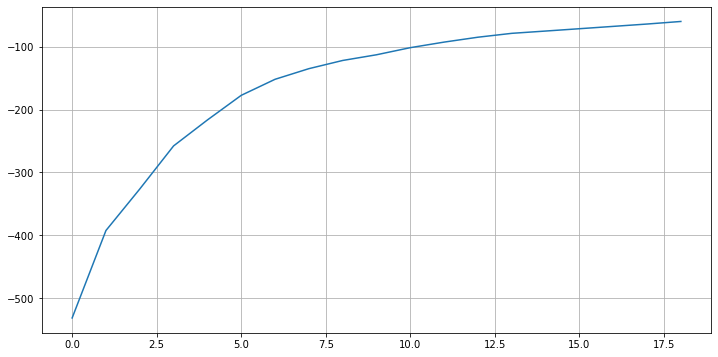

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(score)
plt.grid()
plt.show()

In [49]:
kmeans = KMeans(n_clusters = 14, random_state = 42)
kmeans.fit(df)

KMeans(n_clusters=14, random_state=42)

In [50]:
category = list(kmeans.labels_)

In [52]:
data['Category'] = category

In [53]:
data.head(15)

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,12/12/2019,THE ROOM GURGAON,0.0,0,-127.00,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,12/12/2019,CUT AND STYLE GURGAON,0.0,1,-499.00,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,12/12/2019,MUMUSO GURGAON,0.0,2,-388.00,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,12/12/2019,THE ROOM GURGAON,0.0,0,-108.00,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,12/12/2019,THE ROOM GURGAON,0.0,0,-50.00,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
5,13-12-2019,JAIPUR SPACEJAIPUR,0.0,2,-360.00,JASJIT KAUR,DOMESTIC,INR,SECTOR 9,JAIPUR,RAJASTHAN,INDIA
6,13-12-2019,CAFE COFFEE DAYHIGHWAY KI,0.0,6,-286.00,JASJIT KAUR,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
7,14-12-2019,CAFE COFFEE DAYALANKAR PL,0.0,6,-786.00,JASJIT KAUR,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
8,15-12-2019,LIFE STYLE INTERNATIONA JAIPUR,0.0,10,-1698.00,VIBHORE GOYAL,DOMESTIC,INR,DURGADAS COLONY,JAIPUR,RAJASTHAN,INDIA
9,15-12-2019,NEW U 47 JAIPUR,0.0,10,-1890.00,VIBHORE GOYAL,DOMESTIC,INR,JAIPUR,JAIPUR,RAJASTHAN,INDIA
